### Project 1
- Cohort Analysis for assessing customer retention in E-commerce industry

**Import All Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

**Load dataset**

In [5]:
data = pd.read_csv("Dataset_ecommerce.csv")

In [6]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [7]:
# Descriptive Statistics of the data
# for numerical data types
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [8]:
# to include all data types
data.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [9]:
# now let's check for missing values in the data
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [10]:
# Due to the largeness of the missing values in the data, we have to drop the missing values to get a clean data for our exploration
data.dropna(inplace = True)

In [11]:
# if missing values were successfully dropped
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [12]:
# check for more info on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
# from this info, we can see the invoice date is in object type format, we have to convert this to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
# now check for the correct datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Exploratory Data Analysis

In [15]:
# check thru the countries to see the pattern of purchase behaviour by country from the data to know their level of activity
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [16]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


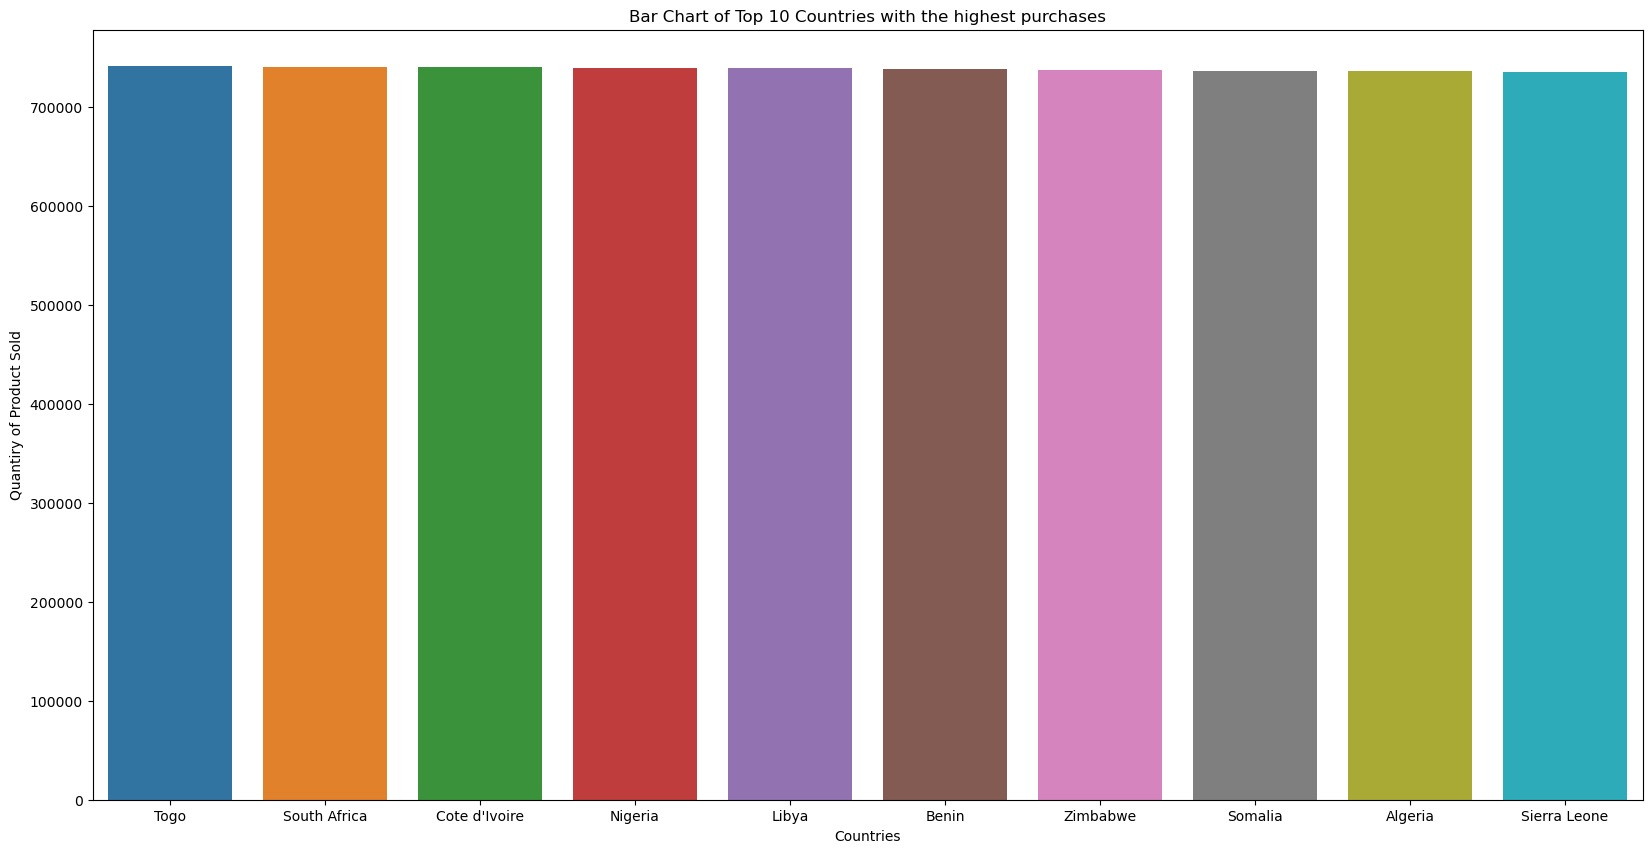

In [17]:
# let's display or visualize the top 10 countries with the most quantity of products purchased
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (20,10))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country )

plt.xlabel("Countries")
plt.ylabel("Quantiry of Product Sold")
plt.title("Bar Chart of Top 10 Countries with the highest purchases")
plt.show()

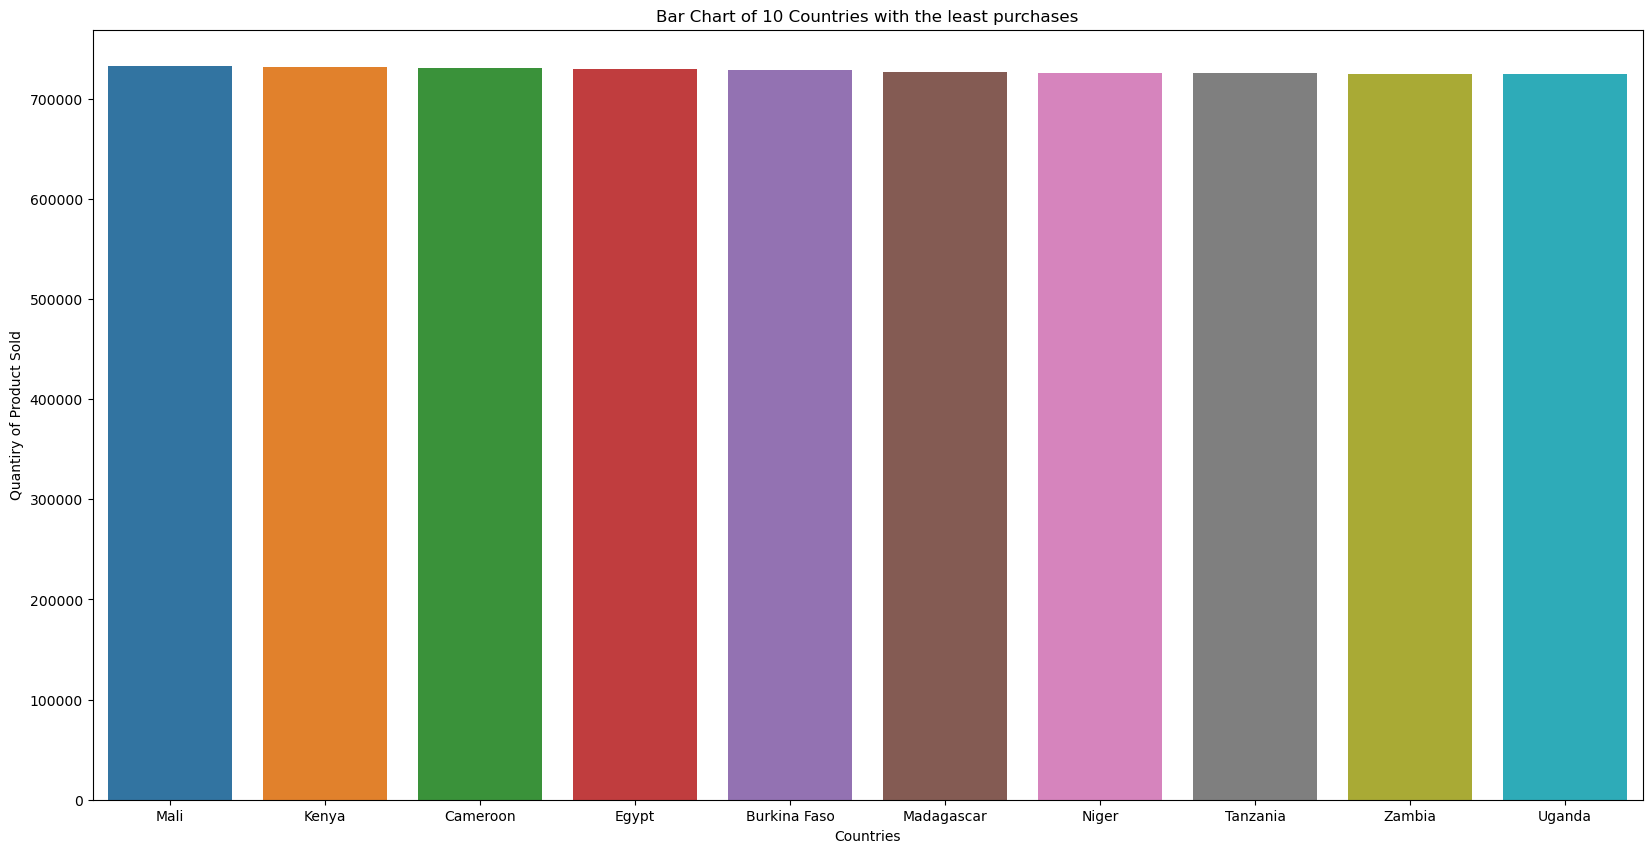

In [18]:
# let's visualize the 10 countries with the least quantity of products purchased
least_10_country = quantity_by_country.tail(10)

plt.figure(figsize = (20,10))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_country )

plt.xlabel("Countries")
plt.ylabel("Quantiry of Product Sold")
plt.title("Bar Chart of 10 Countries with the least purchases")
plt.show()

### Analysis of countries and number of customers**

In [20]:
# For this visualization, we will see the countries with the most customers to compare if those locations march the places with the highest purchases
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False).reset_index()
country_to_customer.head(4)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051


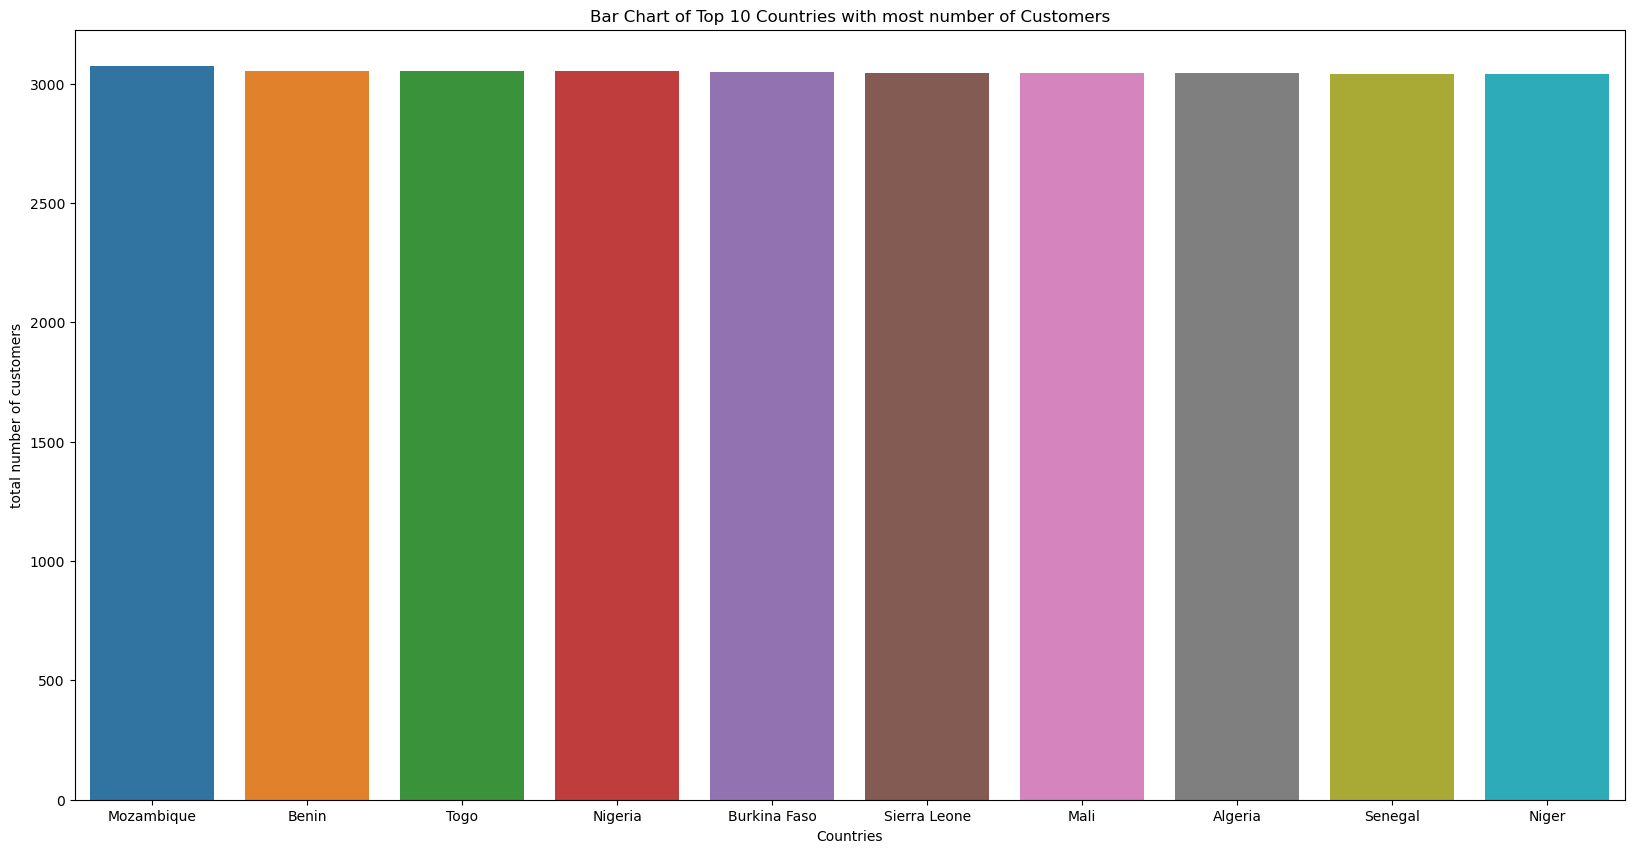

In [21]:
# let's visualize the patterns through the analysis of countries by the number of customers in such countries
top_10_countries_to_customer = country_to_customer.head(10)


plt.figure(figsize = (20,10))
sns.barplot(x = "Country", y = "CustomerID", data = top_10_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel("total number of customers")
plt.title("Bar Chart of Top 10 Countries with most number of Customers")
plt.show()

### Sales Trend Visualization

In [23]:
# to see the fluctuation in sales to see the pattern in purchases thru the eye of the invoice occurrence by summing up all the quantities of goods sold per month.
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()

In [24]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

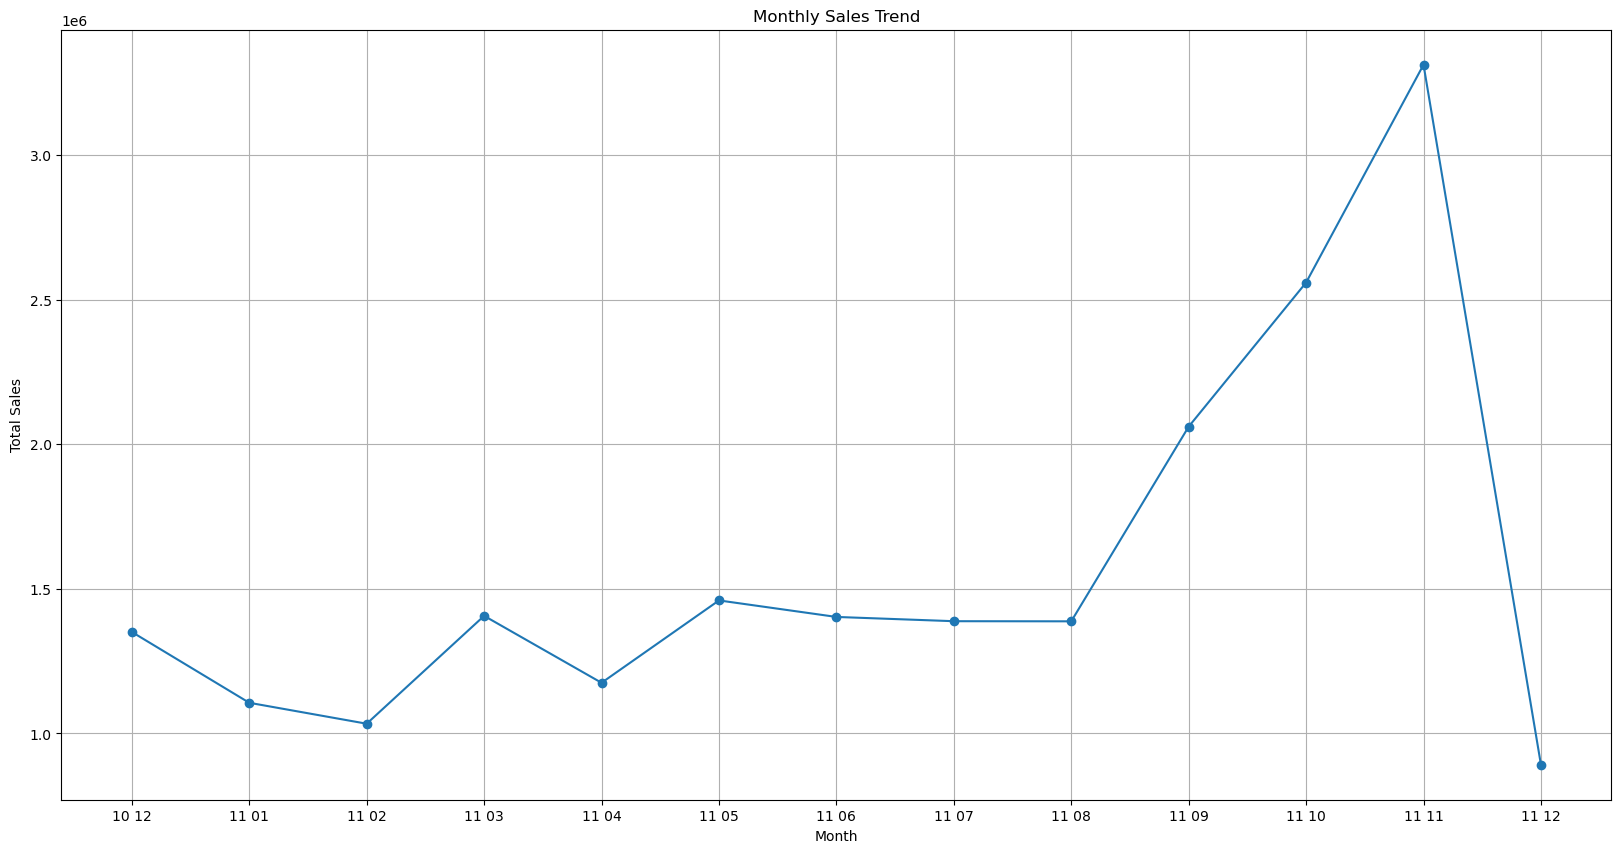

In [25]:
# Create a line plot to show the total monthly sales (%y %m) means year-to-month format to show the pictorial representation of the invoice date as well as the quantities sold alongside. Note that the x-axis will depict the year and the month date while the y-axis will depict the quantities sold
plt.figure(figsize = (20,10))
plt.plot(monthly_sales.index.strftime("%y %m"), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show();

# Cohort Analysis

In [27]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [28]:
# From above we see the invoice date has the year-month-date as well as hour-to-minutesto seconds format. We dont need the hour to minutesto seconda aspects of the invoice date
# we will write a function to handle this, this function will give just the sub-section we need
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [29]:
# now let's apply this function to the dataframe and see the update 
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [30]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [31]:
# Now, we need to create a new column called the "cohort date" to show the first day each customer made their first purchase which is what we need to create our cohort analysis to segment them into cohorts
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [32]:
data["cohort date"] = get_cohort_date(data)

In [33]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


### Cohort Index

In [35]:
# Now that we have the column that shows the first month each customer made their first purchase, we need a cohort index that will show us when the customer made another purchase and this will inform us of the difference in time the customer made yet another purchase after the last purchase, and so on and so forth.
# now let's get a function to extract the year and month of both the invoice date and the month and year of the cohort date as this will enable us get the cohort index(the difference in month) of the first invoice date and the cohort date.
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [36]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [37]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [38]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [39]:
# we need the latest month, latest year for each customer
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [40]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [41]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [42]:
# We can now create our cohort index
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [43]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [44]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


### We can now use this info to create a pivot table and our cohort table

In [46]:
# let's create a cohort table to organize the above information

# Now we need cohort info ( a sub-dataframe of our original dataframe showing all relevant info needed for our cohort table

cohort_info = data.groupby(["cohort date", "cohort_index"])["CustomerID"].nunique().reset_index()

In [47]:
cohort_info

,cohort date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [48]:
# For clarity purpose, lets rename the CustomerID to number of customers
cohort_info.rename(columns = {"CustomerID" : "Number of Customers"}, inplace = True)

In [49]:
cohort_info

,cohort date,cohort_index,Number of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [50]:
# After creating our cohort_info table, it's time to create our cohort table
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of Customers")

In [51]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Convet date format to a more readable format
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of Customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [53]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


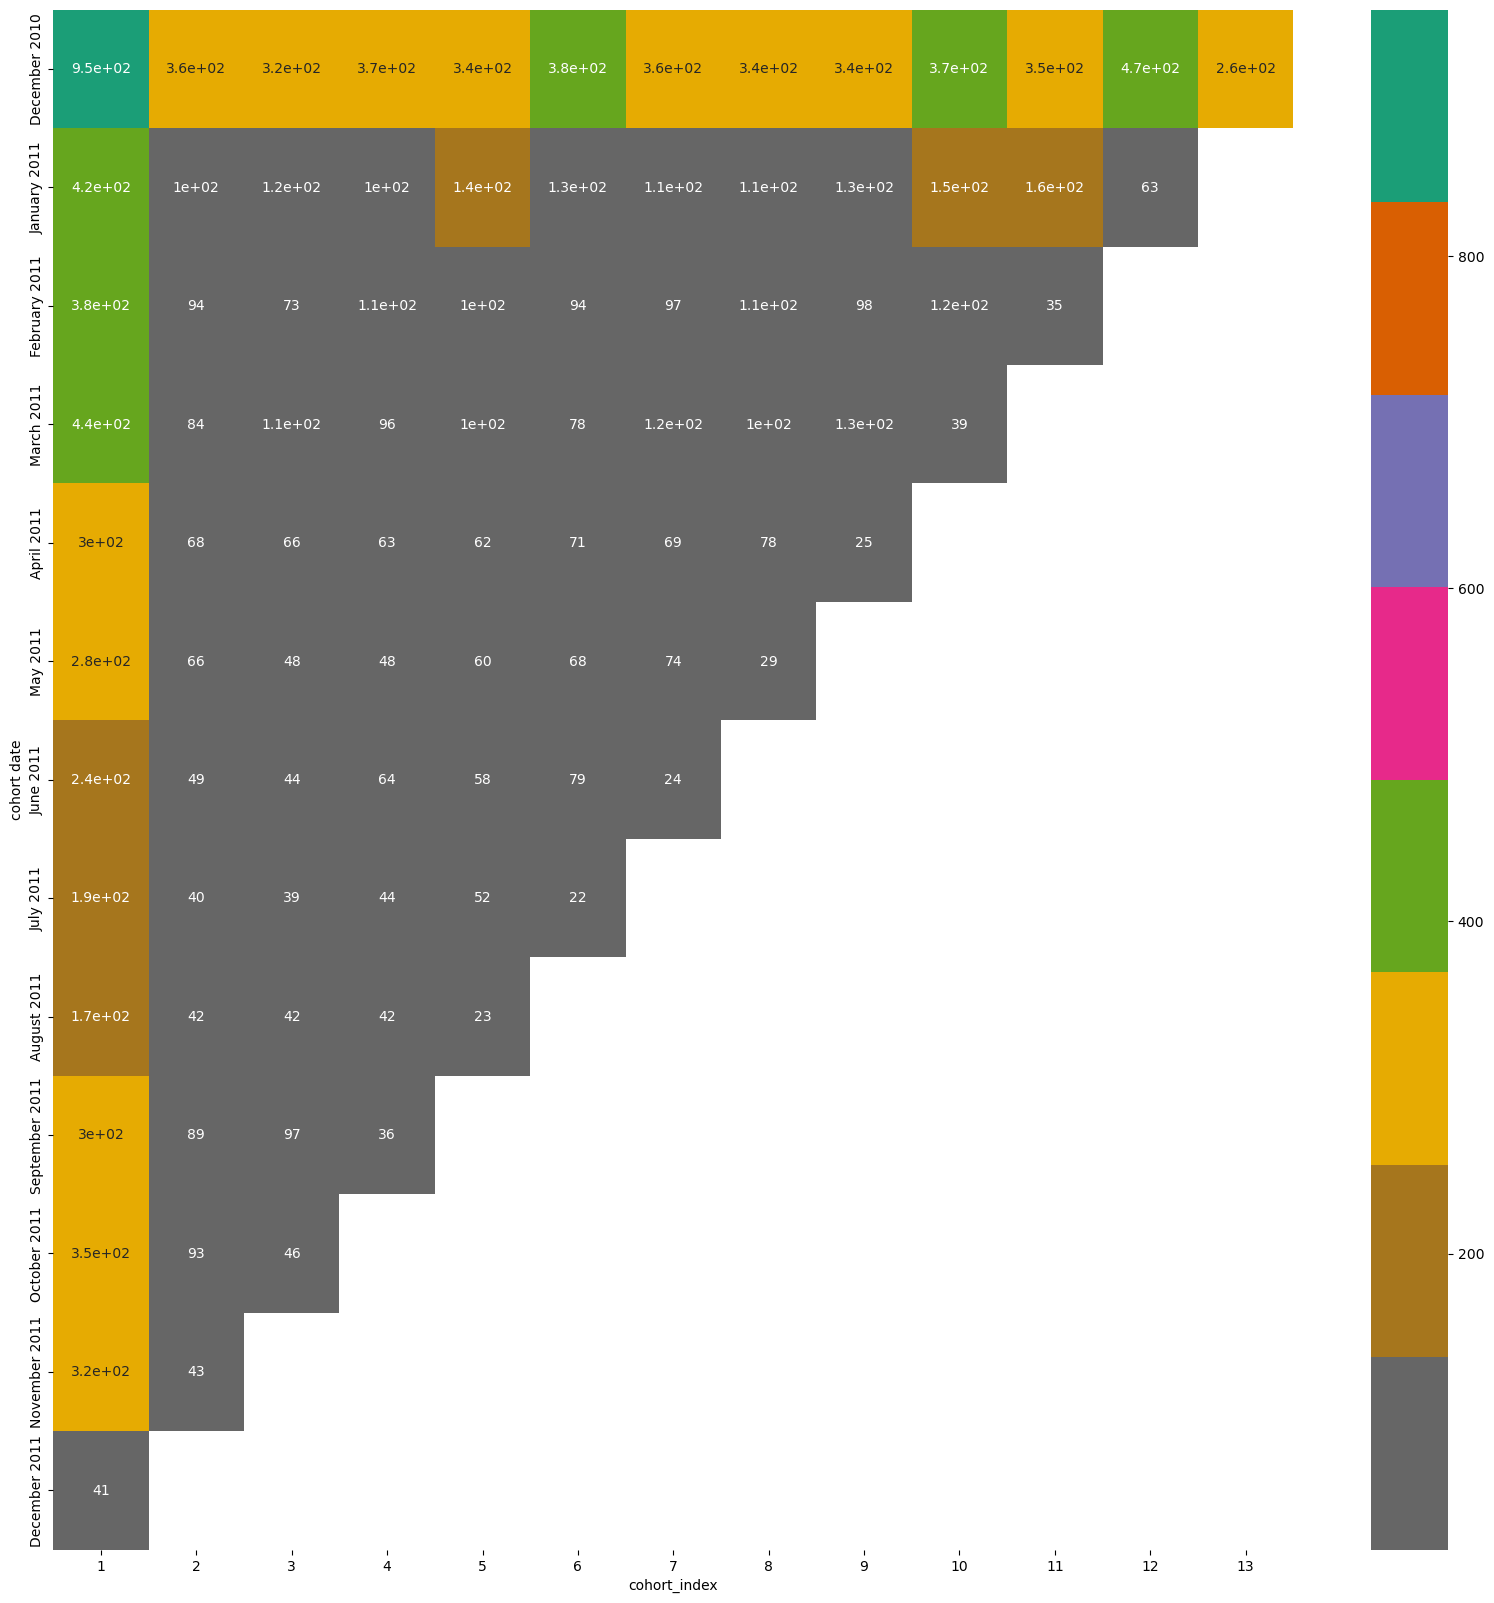

In [54]:
# let's plot our cohort chart 
plt.figure(figsize = (20,20))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r");

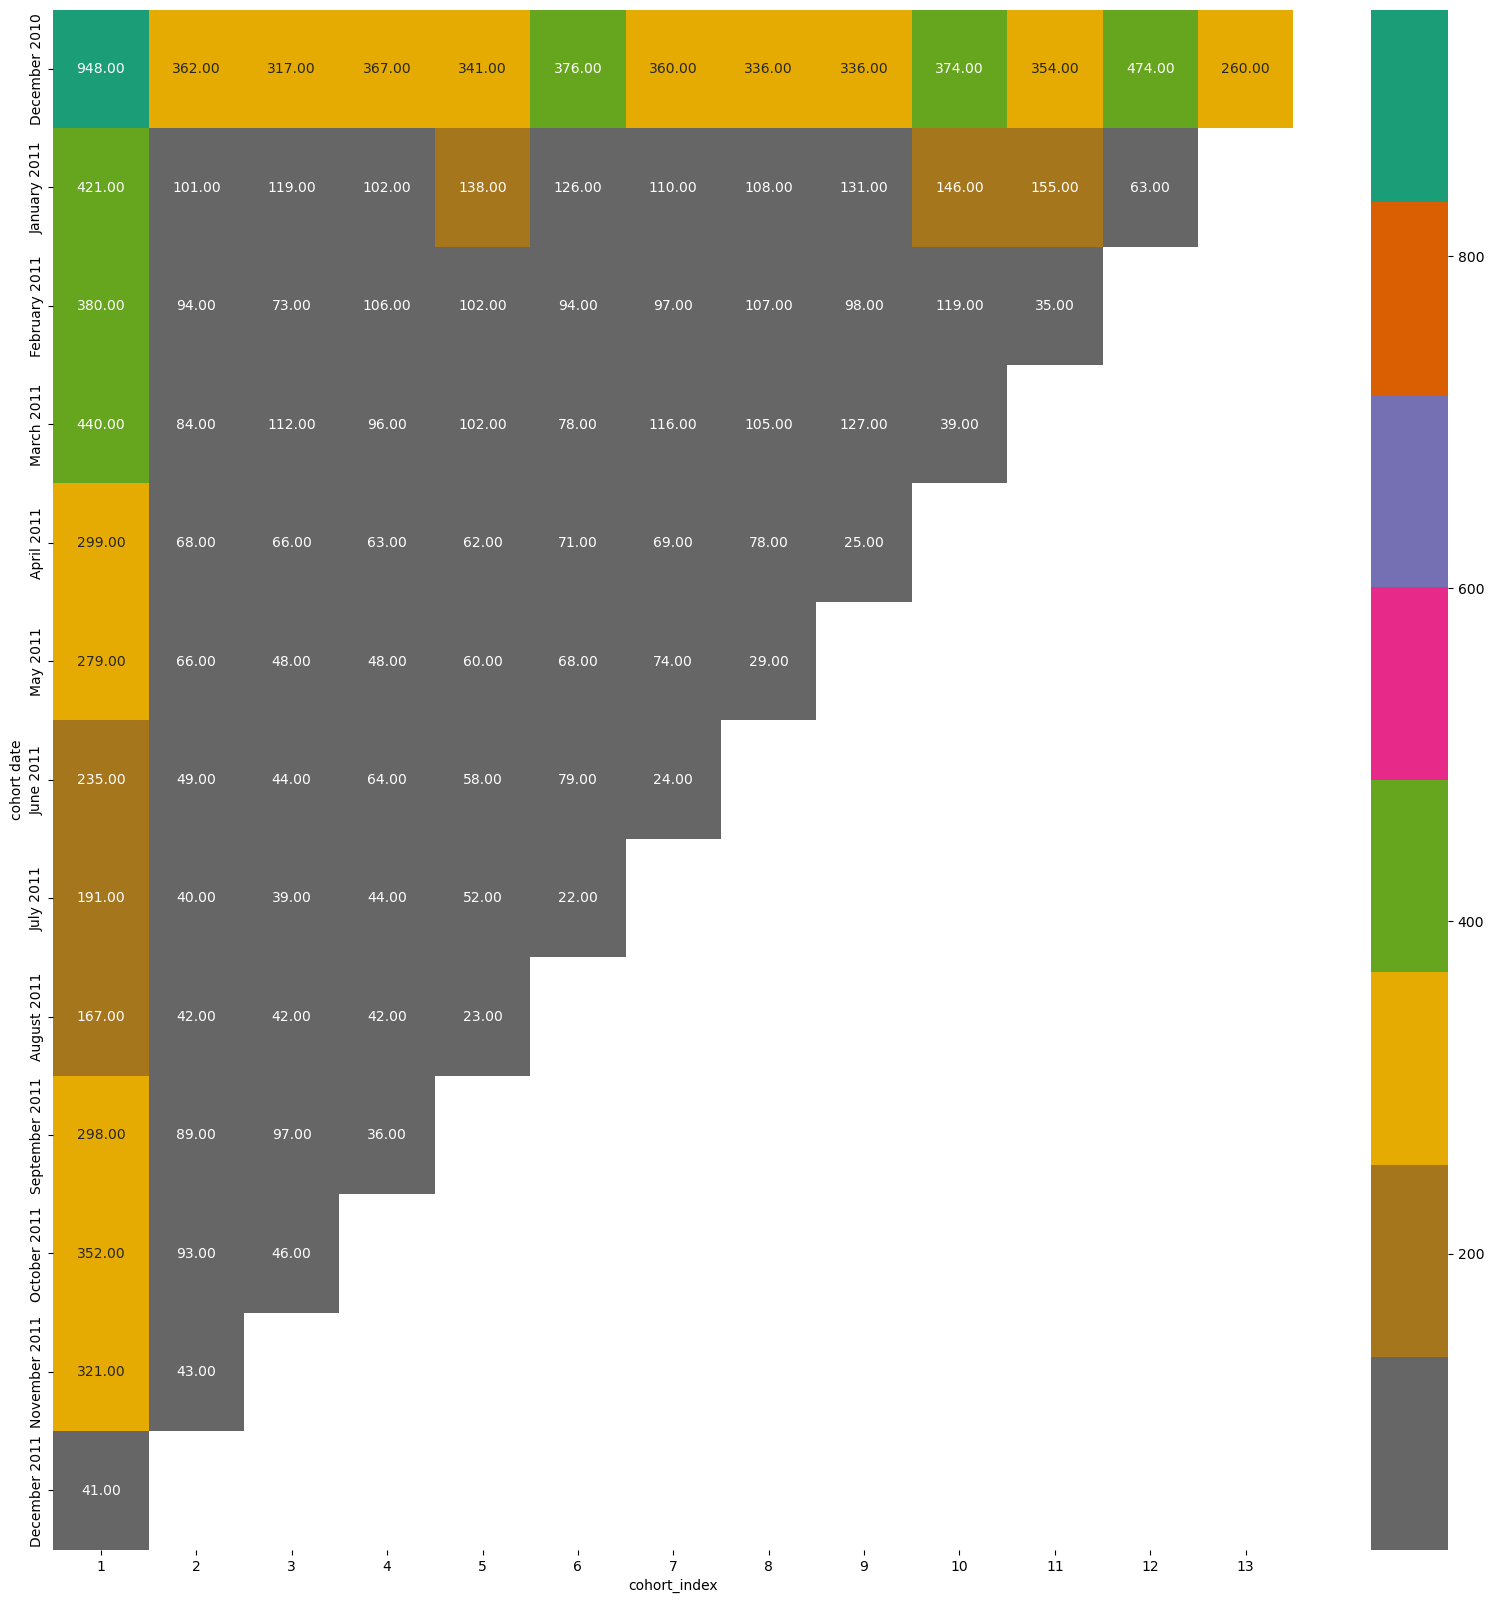

In [55]:
# for legible readability of our heatmap we have to specify the format it should appear for example 2 decimal places
plt.figure(figsize = (20,20))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f");

### To get the retention rate, we have to create a new cohort table to represent the retained customers

In [57]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis = 0)


In [58]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


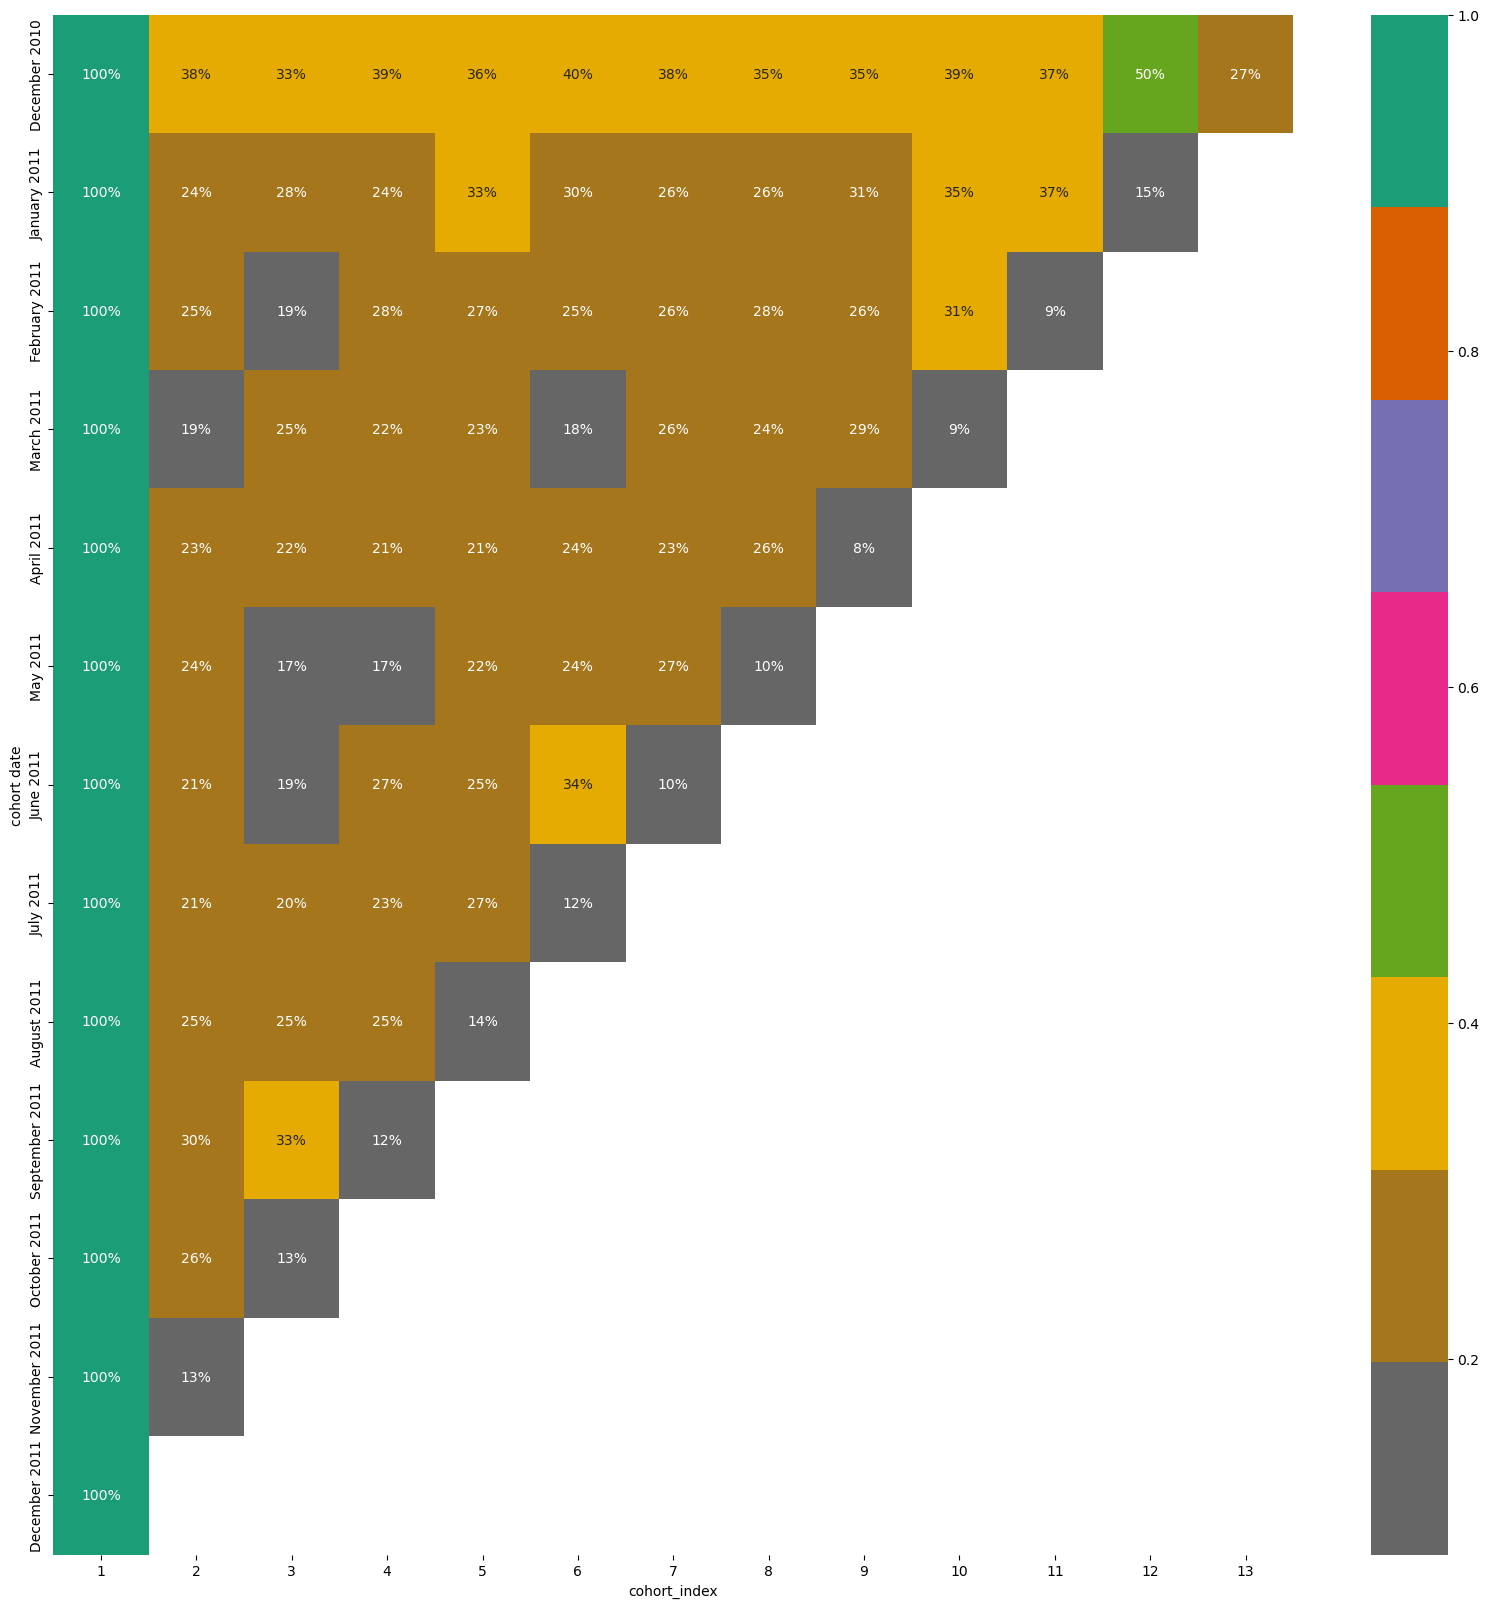

In [59]:
# now lets plot our cohort pivot chart to show the cohort in percentage
plt.figure(figsize = (20,20))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt = ".0%");

# Quantity Bought

In [61]:
# By Total Quantity of Purchases Bought
quantity_bought = data.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [62]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [63]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values ="Quantity")

In [64]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
2011-01-01,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
2011-02-01,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
2011-03-01,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
2011-04-01,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
2011-05-01,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [66]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


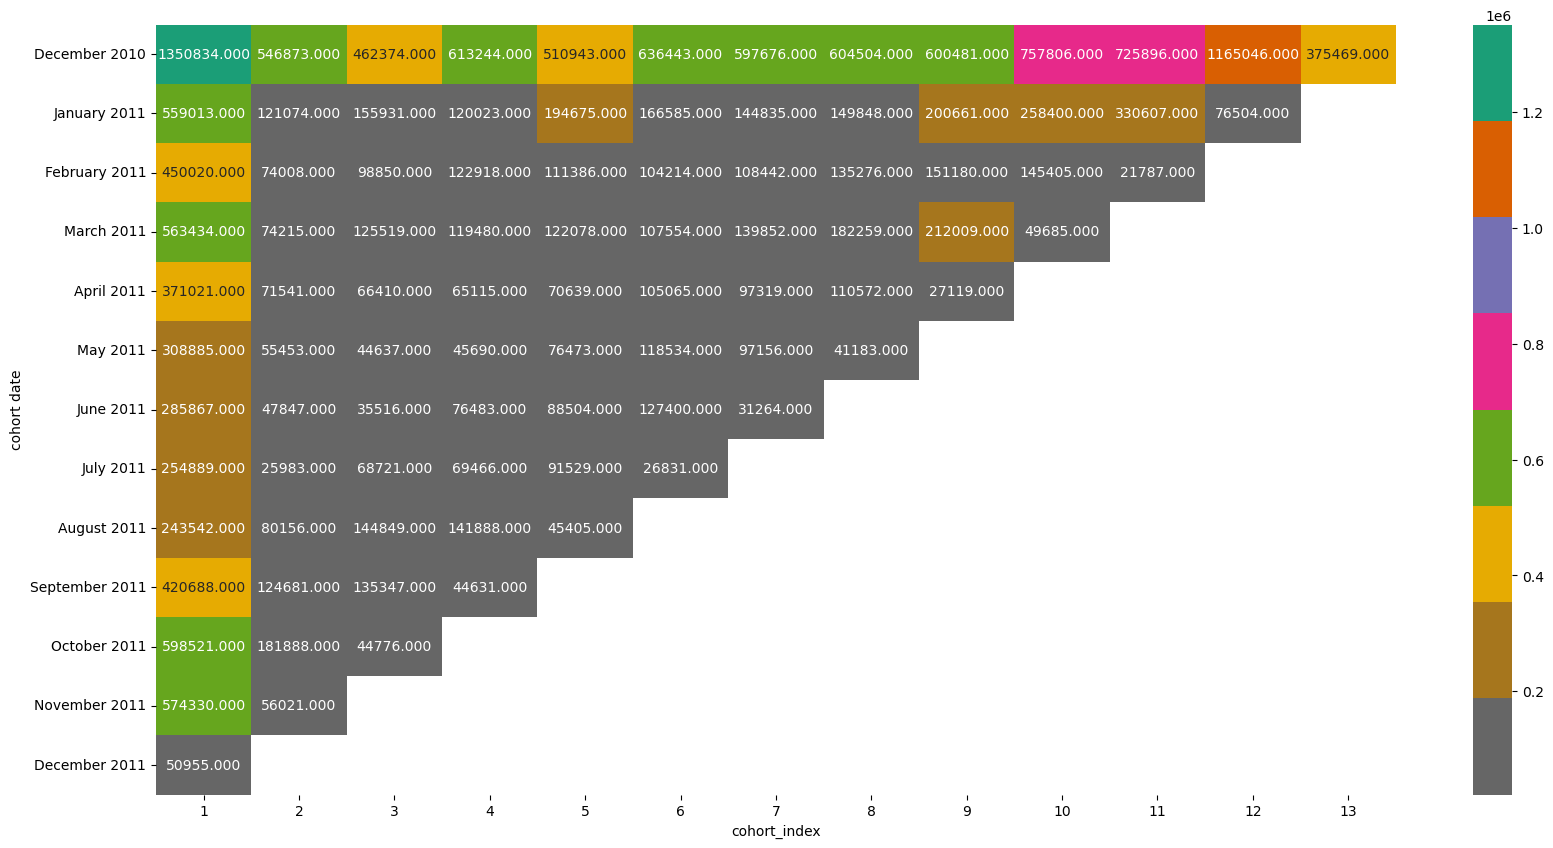

In [67]:
# Now we can create our cohort chart showing the total quantity of goods bought by customers
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f");

In [68]:
# By Average Quantity of Purchases Bought
quantity_bought = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()

In [69]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [70]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values ="Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [71]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


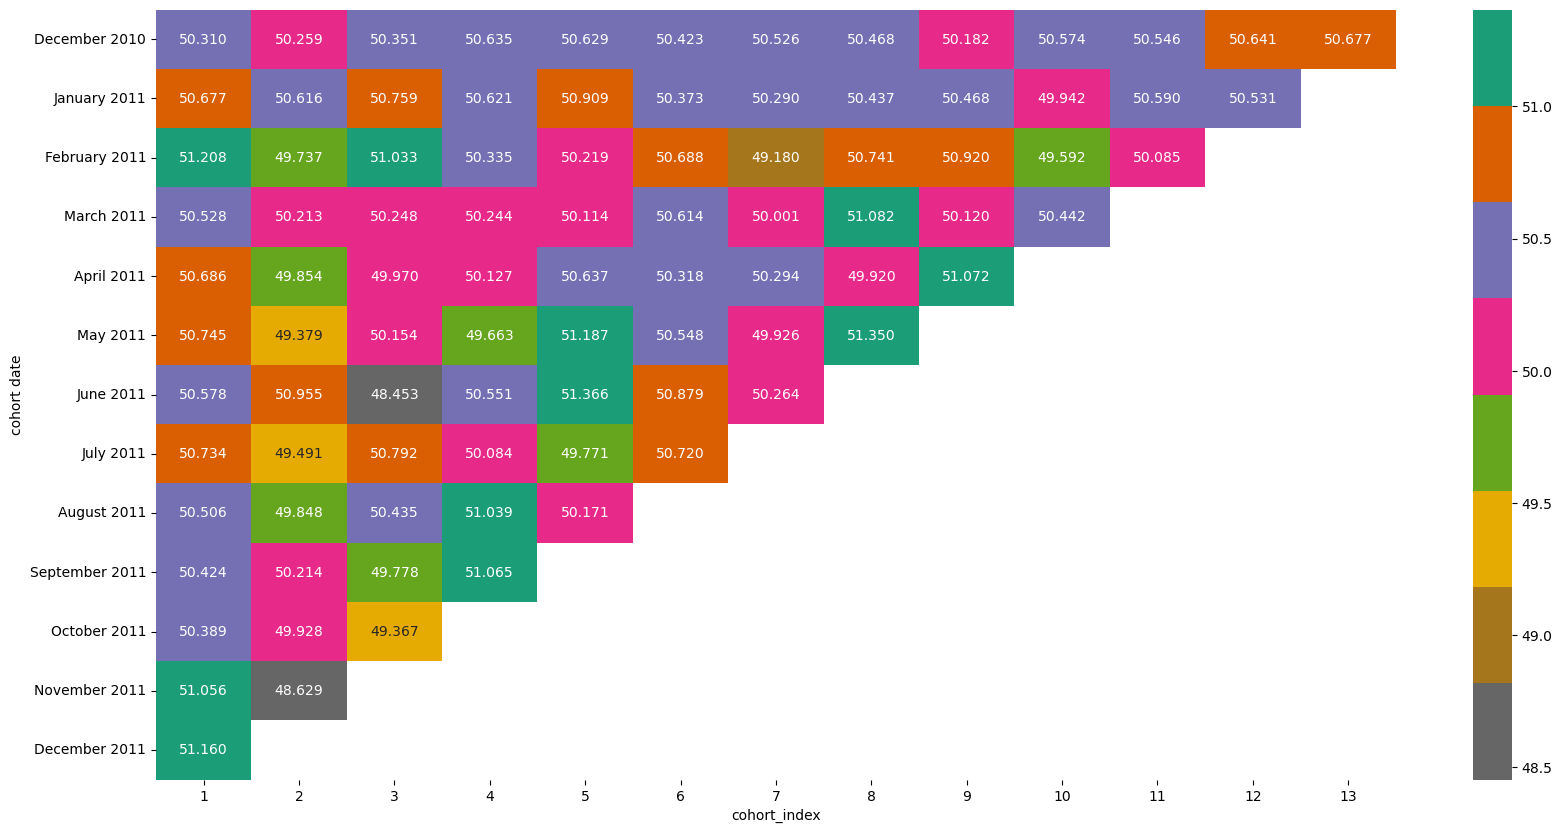

In [72]:
# now we can create our cohort chart showing the average quantity of goods bought by customers
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f");

In [73]:
# Note
# We observe that though the total number of customers went down the average goods sold was still around 50.0 and so on revealing that the few customers who bought goods still boughtvery good volumes

# Customer Segmentation Analysis

# Work Flow
 - Building of Model
 - Training of Model
 - Evaluation of Model

In [76]:
# Customer Segmentation Model - E-commerce Industry
# Clustering of Customers using K - Means
# Go through scikit - learn documentation

In [77]:
# Import Required Libraries

# Machine Learning and Evaluation Libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1. Import the Necessary Libraries


In [79]:
# Chat GPT Codes

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Prepare the Data
Ensure you have the relevant features (e.g., Recency, Frequency, and Monetary Value) ready for clustering.

### Calculate RFM Features
Recency:
Measures how recently a customer made a purchase.
Calculate the difference (in days) between the reference date (e.g., dataset's most recent date) and the last purchase date for each customer.


In [82]:
# Define reference date (e.g., one day after the latest transaction date)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate Recency
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]


### Frequency:
Measures how often a customer made purchases during the observation period.
Count the number of unique transactions per customer.


In [84]:
# Calculate Frequency
frequency = data.groupby('CustomerID').size().reset_index(name='Frequency')


### Monetary Value:
Measures how much money a customer spent in total.
Multiply Quantity by UnitPrice for each transaction and sum it per customer.


In [86]:
# Calculate Total Price for each transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Calculate Monetary Value
monetary = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'MonetaryValue'}, inplace=True)


### Combine RFM Features
Merge the Recency, Frequency, and MonetaryValue features into a single DataFrame.

In [88]:
# Merge RFM features
rfm_features = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Preview RFM features
print(rfm_features.head())


   CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      335          2        5342.40
1     12347.0        1        182      431501.00
2     12348.0       92         31       82378.47
3     12349.0       31         73      176075.12
4     12350.0      304         17       48173.37


### Normalize RFM Data
Since the values of Recency, Frequency, and MonetaryValue may have different scales, normalize them to prepare for clustering.

In [90]:
from sklearn.preprocessing import StandardScaler

# Select RFM columns for scaling
features = rfm_features[['Recency', 'Frequency', 'MonetaryValue']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(features)


### Validate the Prepared Data
Before clustering, check that the data is ready:

Check for missing values: Ensure no null values remain in rfm_scaled.
Check scaling: Ensure the scaled data has mean ~0 and standard deviation ~1.

In [92]:
# Check for missing values
print(rfm_features.isnull().sum())

CustomerID       0
Recency          0
Frequency        0
MonetaryValue    0
dtype: int64


In [93]:
print("Scaled RFM features (first 5 rows):\n", rfm_scaled[:5])


Scaled RFM features (first 5 rows):
 [[ 2.34163574 -0.3917197  -0.39022789]
 [-0.96420082  0.38265697  0.32673724]
 [-0.06350882 -0.26695902 -0.26062315]
 [-0.66726939 -0.08627113 -0.1029888 ]
 [ 2.0348066  -0.32718831 -0.31816948]]


In [94]:
# Define the column names for the scaled features
scaled_columns = ['Recency', 'Frequency', 'MonetaryValue']

#rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_features.columns)

# Create a DataFrame with the correct number of columns
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=scaled_columns)

# Check the result
print(rfm_scaled_df.head())


    Recency  Frequency  MonetaryValue
0  2.341636  -0.391720      -0.390228
1 -0.964201   0.382657       0.326737
2 -0.063509  -0.266959      -0.260623
3 -0.667269  -0.086271      -0.102989
4  2.034807  -0.327188      -0.318169


In [95]:
# Verify scaled data statistics
print(f"Mean of scaled data: {rfm_scaled.mean(axis=0)}")
print(f"Std deviation of scaled data: {rfm_scaled.std(axis=0)}")


Mean of scaled data: [-4.38807270e-17  9.75127268e-18 -2.03151514e-17]
Std deviation of scaled data: [1. 1. 1.]


# 3. Determine the Optimal Number of Clusters (Elbow Method)

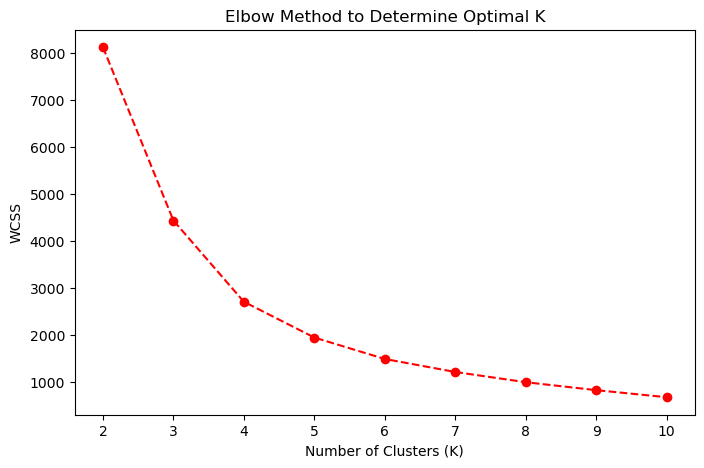

In [97]:
wcss = []  # Within-cluster sum of squares
k_values = range(2, 11)  # Test between 2 and 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='red')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


Look for the "elbow point" where the curve starts flattening. That’s your optimal 
𝐾
K.

# 4. Evaluate Clustering Performance (Silhouette Score)
Use the Silhouette Score to assess how well the clusters are separated.

In [100]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)



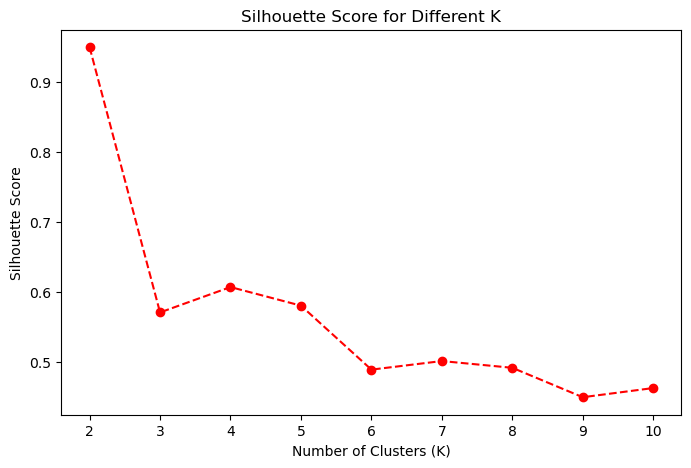

In [101]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [102]:
# Print optimal K based on silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette score is {optimal_k}.")


The optimal number of clusters based on silhouette score is 2.


# 5. Apply KMeans with Optimal 𝐾

In [104]:
# Apply KMeans with the optimal number of clusters
optimal_k = k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_features['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [105]:
# Centroid information
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_columns)
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
    Recency  Frequency  MonetaryValue
0 -0.696948   0.349638       0.350686
1  1.122320  -0.266932      -0.266451
2 -0.964201  33.943281      33.894345
3 -0.625098  -0.208488      -0.207767
4 -0.838005   3.228384       3.199817
5  2.160729  -0.299999      -0.299327
6 -0.964201  22.075242      22.167614
7 -0.889968   7.913470       7.915834
8  0.166209  -0.229169      -0.229682
9 -0.773981   1.308507       1.302903


In [106]:
print(f"Shape of kmeans.cluster_centers_: {kmeans.cluster_centers_.shape}")


Shape of kmeans.cluster_centers_: (10, 3)


In [107]:
print(f"Features: {features}")
print(f"Type of features: {type(features)}")


Features:       Recency  Frequency  MonetaryValue
0         335          2        5342.40
1           1        182      431501.00
2          92         31       82378.47
3          31         73      176075.12
4         304         17       48173.37
...       ...        ...            ...
4367      276         10       18907.36
4368      184          7       26009.01
4369        1         13       36010.74
4370        1        756     2008747.62
4371       62         70      209057.23

[4372 rows x 3 columns]
Type of features: <class 'pandas.core.frame.DataFrame'>


In [108]:
features = rfm_features.columns.tolist()


In [109]:
print(f"Features: {features}")
print(f"Type of features: {type(features)}")


Features: ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Cluster']
Type of features: <class 'list'>


In [110]:
print(f"Length of features: {len(features)}")
print(f"Number of columns in kmeans.cluster_centers_: {kmeans.cluster_centers_.shape[1]}")


Length of features: 5
Number of columns in kmeans.cluster_centers_: 3


# 6. Visualize Clusters (Optimal K)
Use scatter plots to explore cluster distribution:

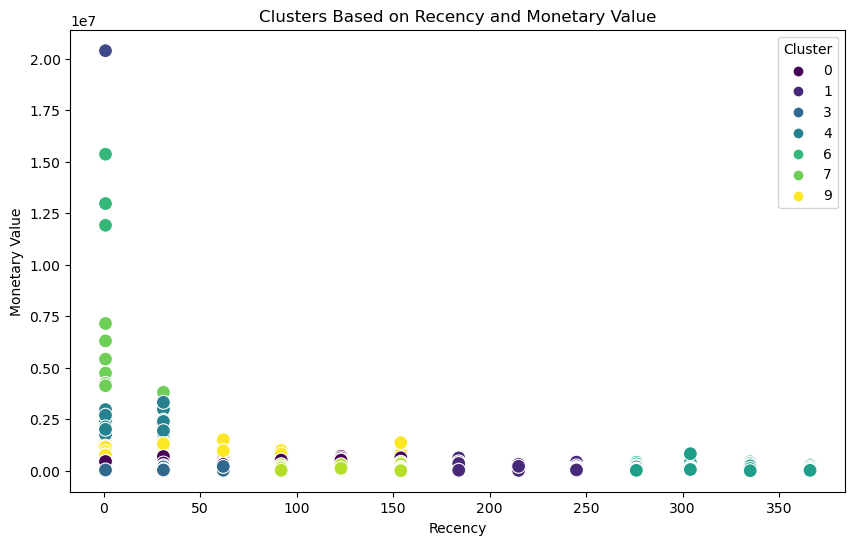

In [112]:
# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm_features['Recency'],
    y=rfm_features['MonetaryValue'],
    hue=rfm_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Recency and Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


# Apply KMeans with k = 3 clusters

In [114]:
# Apply KMeans with the optimal number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm_features['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [115]:
# Centroid information
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_columns)
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
    Recency  Frequency  MonetaryValue
0 -0.527820   0.068875       0.068670
1  1.489101  -0.281357      -0.280979
2 -0.964201  25.042252      25.099297


# Visualize Clusters (3 clusters)
Use scatter plots to explore cluster distribution:

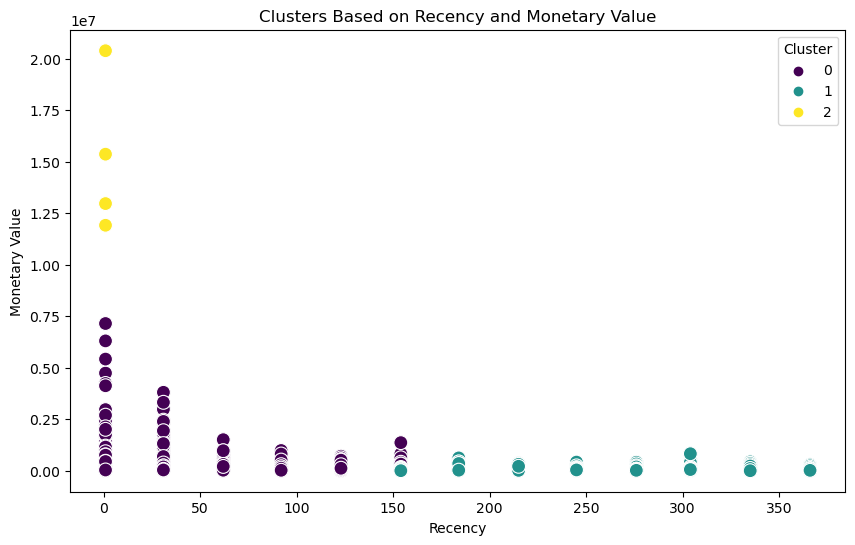

In [117]:
# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm_features['Recency'],
    y=rfm_features['MonetaryValue'],
    hue=rfm_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Recency and Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


## Next Steps
Interpret Clusters: Analyze the cluster centroids to understand customer behavior.

### Notes on this cluster group for the management of E -commerce

### Actionable Strategies: Develop marketing strategies for each cluster based on their characteristics.


### Cluster Centroids:
The `cluster_centroids` data represents the central values (mean) of each cluster in terms of the `Recency`, `Frequency`, and `MonetaryValue` features. Here's a breakdown of the output you shared:

```
Cluster Centroids:
    Recency  Frequency  MonetaryValue
0 -0.527820   0.068875       0.068670
1  1.489101  -0.281357      -0.280979
2 -0.964201  25.042252      25.099297
```

This means:
- **Cluster 0**: Lower recency and frequency, lower monetary value.
- **Cluster 1**: Higher recency, lower frequency, lower monetary value.
- **Cluster 2**: Low recency and frequency but very high monetary value.

### Scatter Plot:
The scatter plot visually distinguishes the clusters based on `Recency` and `MonetaryValue`. Clusters are color-coded, allowing you to see how well the data points are separated based on these two features.

### Actionable Strategies:
- **For Cluster 0** (low recency and frequency, low monetary value), you might consider creating **targeted marketing campaigns** to re-engage these customers, perhaps offering incentives or discounts to encourage more frequent purchases.
  
- **For Cluster 1** (high recency, low frequency, low monetary value), these customers may be new or occasional buyers. Consider **personalized promotions** or upselling strategies to increase their spending or turn them into more regular customers.
  
- **For Cluster 2** (low recency, low frequency, high monetary value), these customers are valuable but may be less frequent. Consider **loyalty programs**, offering exclusive deals, or even VIP services to maintain their interest and maximize their lifetime value.

This clustering can also help you with inventory management by predicting the types of customers more likely to make high-value purchases.


# Apply KMeans with k = 4 clusters

In [122]:
# Apply KMeans with the optimal number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm_features['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [123]:
# Centroid information
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_columns)
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
    Recency  Frequency  MonetaryValue
0 -0.508633  -0.069093      -0.068596
1 -0.964201  25.042252      25.099297
2 -0.802554   2.008024       1.997888
3  1.488282  -0.281025      -0.280635


# Visualize Clusters (4 clusters)
Use scatter plots to explore cluster distribution:

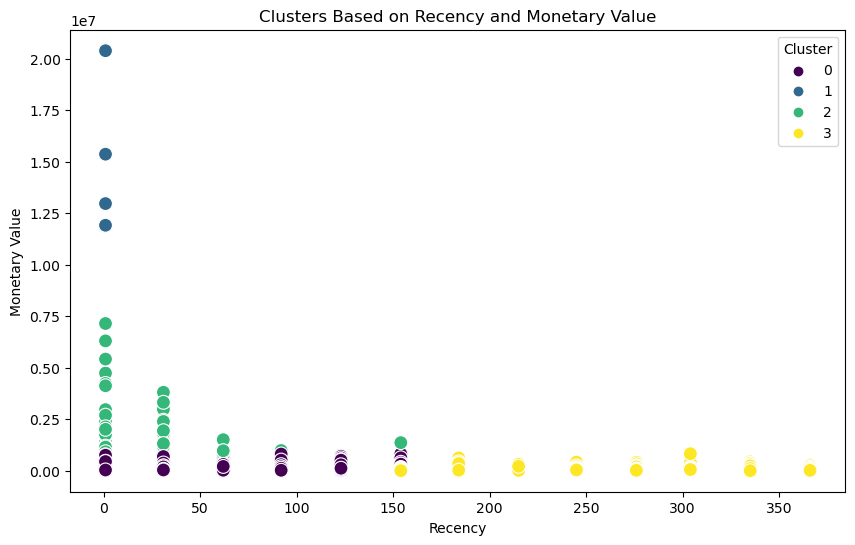

In [125]:
# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm_features['Recency'],
    y=rfm_features['MonetaryValue'],
    hue=rfm_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Recency and Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


### Actionable Strategies: Develop marketing strategies for each cluster based on their characteristics.



### **1️⃣ Understanding the Cluster Centroids**
The centroid values represent the "center" or "average" point of each cluster for the features **Recency**, **Frequency**, and **MonetaryValue**. Since these values are scaled, they aren't in the original units but relative to the mean and standard deviation. 

**Cluster Centroids Table:**
| **Cluster** | **Recency** | **Frequency** | **MonetaryValue** | **Interpretation** |
|-------------|-------------|---------------|-------------------|
| **0**       | -0.509      | -0.069        | -0.069            | Customers with average R, F, and M values. Potentially "Regular Customers". |
| **1**       | -0.964      | 25.042        | 25.099            | **High-Value Customers** — They purchase frequently and spend a lot of money. Ideal for VIP treatment! |
| **2**       | -0.803      | 2.008         | 1.998             | **Potential Loyalists** — They have frequent and moderately high monetary transactions. Nurture them to become loyal. |
| **3**       | 1.488       | -0.281        | -0.281            | **Lost/Churned Customers** — They haven't purchased recently and have low frequency and spending. Consider win-back campaigns. |

> 🔍 **Insight:**  
Notice how **Cluster 1** has exceptionally large positive values for **Frequency** and **MonetaryValue**, indicating **high-spending and frequent customers**. On the other hand, **Cluster 3** has a large positive Recency value (1.488), meaning these customers haven’t purchased in a while.

---

### **2️⃣ Scatter Plot Insights**
The scatter plot visualizes customers based on **Recency** and **MonetaryValue** while coloring them by their cluster. Here's how to interpret the plot:  
- **Clusters closer to the origin** (lower R, M) may represent "Regular" or "Potential Loyalists."  
- **Clusters with high Recency (far right)** may be customers who haven't purchased in a while (e.g., "Churned Customers").  
- **Clusters with high MonetaryValue (far up)** are **High-Value Customers** or VIPs.  

---

### **3️⃣ Actionable Strategies for Each Cluster**
Here’s how you can tailor marketing strategies for each cluster:

| **Cluster** | **Characteristics**           | **Suggested Strategy**                                      |
|-------------|-------------------------------|-----------------------------------------------------------|
| **Cluster 0** | Regular customers (average RFM) | **Retention Strategy:** Send periodic emails, offer small incentives, and promote ongoing loyalty. |
| **Cluster 1** | **High-Value Customers** (low R, high F, high M) | **VIP Strategy:** Exclusive deals, early access, premium support, and loyalty program invitations. These customers are the most profitable! |
| **Cluster 2** | **Potential Loyalists** (low R, moderate F, moderate M) | **Loyalty Nurturing Strategy:** Send personalized offers, showcase new products, and provide upsell opportunities. Convert them into VIPs! |
| **Cluster 3** | **Lost/Churned Customers** (high R, low F, low M) | **Win-Back Strategy:** Launch a reactivation campaign with discounts, reminders, or "We Miss You" emails. Test out re-engagement campaigns. |

> 🔥 **Pro Tips for Strategy Development**:  
- **Use email segmentation**: Send targeted emails to each cluster with specific messages.  
- **Offer time-limited deals**: Especially for Cluster 3, time-sensitive discounts can reignite customer interest.  
- **Personalize the experience**: VIPs (Cluster 1) should receive priority support and sneak peeks of new collections.  

---

### **Next Steps**
- **Refine the Elbow Method**: If you're unsure of the optimal number of clusters, you could try a new elbow plot.  
- **Visualize in 3D**: Since you have 3 features (R, F, M), a 3D scatter plot would give better separation between clusters.  
- **Profile Each Cluster**: Calculate and visualize the **mean Recency, Frequency, and MonetaryValue** for each cluster. This will help in understanding their unique characteristics.

---


# Apply KMeans with k = 5 clusters

In [129]:
# Apply KMeans with the optimal number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm_features['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [130]:
# Centroid information
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_columns)
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
    Recency  Frequency  MonetaryValue
0 -0.491110  -0.140586      -0.139844
1  1.482586  -0.278433      -0.278018
2 -0.964201  25.042252      25.099297
3 -0.865224   5.406426       5.379263
4 -0.750288   1.048221       1.043634


# Visualize Clusters (5 clusters)
Use scatter plots to explore cluster distribution:

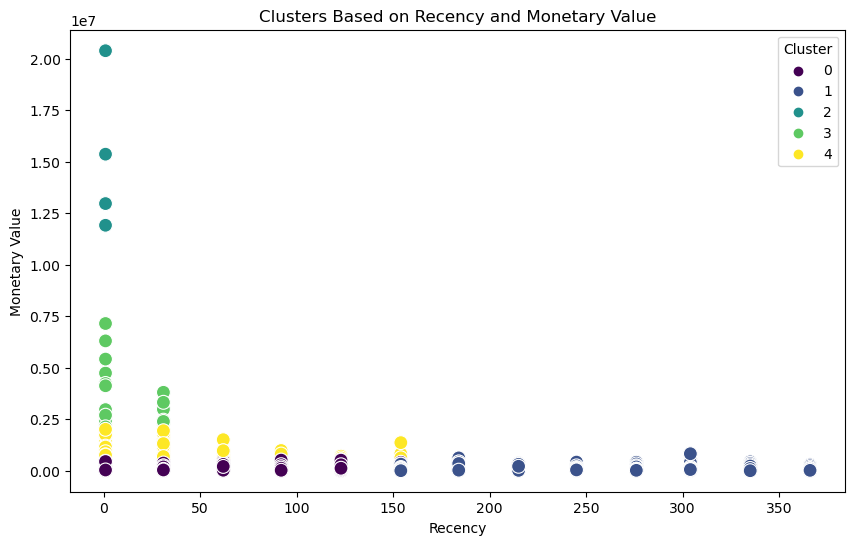

In [132]:
# Scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm_features['Recency'],
    y=rfm_features['MonetaryValue'],
    hue=rfm_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Recency and Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


### Actionable Strategies: Develop marketing strategies for each cluster based on their characteristics.

Here's a breakdown of what's happening, along with actionable strategies you can apply based on the cluster centroids and visualization.

---

### **1️⃣ Cluster Analysis**
The cluster centroids give insight into the "center" of each cluster in terms of **Recency**, **Frequency**, and **Monetary Value**. Here's a quick analysis of each cluster:  

| **Cluster** | **Recency**         | **Frequency**         | **Monetary Value**    | **Interpretation**                                          |
|-------------|---------------------|-----------------------|----------------------|-------------------------------------------------------------|
| **0**       | -0.49 (low)          | -0.14 (low)           | -0.14 (low)           | **Low value customers**: Infrequent, low-spending, and inactive customers. |
| **1**       |  1.48 (high)         | -0.27 (low)           | -0.28 (low)           | **New customers**: Recent buyers but with low frequency and low spending. Focus on upselling. |
| **2**       | -0.96 (very low)     | 25.04 (very high)     | 25.09 (very high)     | **VIPs**: Most frequent and highest spenders. These are your top customers. |
| **3**       | -0.86 (low)          | 5.40 (high)           | 5.37 (high)           | **Loyal customers**: They buy frequently and spend a lot. |
| **4**       | -0.75 (low)          | 1.04 (slightly above avg) | 1.04 (slightly above avg) | **Potential loyalists**: Moderate frequency and spending. They can be nudged into the **Loyal Customers** group. |

---

### **2️⃣ Visualization**
The scatter plot shows the clustering based on **Recency** and **Monetary Value**.  
**Observations from the plot:**
- The **VIPs** and **Loyal customers** will likely stand out as a tight group with high **Monetary Value**.
- **Potential loyalists** might sit between the **Low-value customers** and **Loyal customers**.
- **New customers** will be far right on the **Recency** axis but low on **Monetary Value**, showing they are new but haven't spent much yet.

---

### **3️⃣ Actionable Strategies**
Based on the characteristics of each cluster, here are some targeted strategies to engage and maximize revenue from each group.

| **Cluster**         | **Customer Type**         | **Actionable Strategy**                                                 |
|---------------------|--------------------------|-------------------------------------------------------------------------|
| **0 (Low value)**    | Lost/Churned Customers   | **Re-engagement campaigns**: Use win-back offers, surveys, and discounts. |
| **1 (New customers)**| New Customers           | **Onboarding and upselling**: Welcome emails, product recommendations, and incentives to make a second purchase. |
| **2 (VIPs)**         | High-Value Customers    | **Loyalty programs**: Exclusive benefits, early access, and personalized offers to retain them. |
| **3 (Loyal customers)**| Loyal Shoppers       | **Retention campaigns**: Upsell with complementary products and VIP treatment. Increase their lifetime value. |
| **4 (Potential loyalists)**| Growing Customers| **Conversion tactics**: Personalized product recommendations, membership offers, or exclusive sales. |

---

### **Suggestions to Improve the Analysis**
1. **Feature Engineering**:  
   - Add a "Tenure" feature (how long they've been a customer) for richer analysis.  
   - Include a "Churn Risk" feature for predictive analysis.  

2. **Recheck Data Preprocessing**:  
   - Ensure **scaling** of the RFM features is proper before K-means, as K-means is sensitive to feature magnitude.  

3. **Elbow Method**:  
   - Consider using the **Elbow Method** to determine the ideal number of clusters (`k`). Right now, you have 5 clusters, but maybe 3 or 4 could work better.  

4. **Visualizations**:  
   - Create a **3D scatter plot** using **Recency**, **Frequency**, and **Monetary Value** to visualize the clusters better.  

5. **Validation**:  
   - Calculate the **silhouette score** to ensure the number of clusters is optimal.  

---


### Steps to Calculate Silhouette Score

- Import Required Libraries:

In [136]:
from sklearn.metrics import silhouette_score


### Fit the KMeans model with different numbers of clusters (e.g., 3, 4, 5)


In [138]:
from sklearn.cluster import KMeans

# Example with 3, 4, and 5 clusters
k_values = [3, 4, 5]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=3: 0.5705
Silhouette Score for k=4: 0.6068
Silhouette Score for k=5: 0.5802


### Plot Silhouette Scores for each k

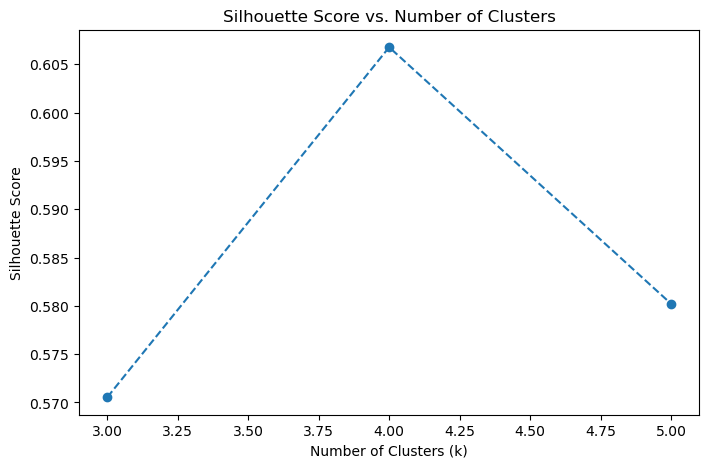

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


.

### How to Decide the Best Number of Clusters
- Highest silhouette score is the best (closer to 1).
- If k=4 has the highest score, then you should go with 4 clusters.
- If the difference between silhouette scores is small (e.g., k=4 and k=5 are close), consider business logic — which one makes more sense from a marketing perspective.


### Example Result (For Reference)
#### k (Clusters)	Silhouette Score
- 3	- 0.56
- 4	- 0.60 (best)
- 5	- 0.59
#### In this case, k=4 would be the best choice because it has the highest silhouette score.



# Advanced Evaluation:
#### Check if other clustering algorithms (e.g., DBSCAN or Agglomerative Clustering) improve performance.


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
##### DBSCAN groups points that are close together, while points in sparse regions are treated as outliers. It works well when the clusters are not spherical or when there is noise in the data.

### Key Parameters of DBSCAN:

- eps: Maximum distance between two samples to consider them neighbors.
- min_samples: Minimum number of samples to form a cluster.
### Code for DBSCAN

In [145]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with eps and min_samples
dbscan_labels = dbscan.fit_predict(rfm_scaled)

# Calculate silhouette score (only if there is more than one cluster)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(rfm_scaled, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_score:.4f}")
else:
    print("DBSCAN did not form distinct clusters. Try adjusting eps and min_samples.")


Silhouette Score for DBSCAN: 0.7596


### How to Tune DBSCAN Parameters

- eps: Start with 0.3 to 0.8 and gradually adjust.
- min_samples: Try from 3 to 10.


### Agglomerative Clustering (Hierarchical Clustering)
##### Agglomerative Clustering builds a hierarchy of clusters using a bottom-up approach where each observation starts as its own cluster and pairs are merged step-by-step.

### Key Parameters of Agglomerative Clustering:
- n_clusters: Number of clusters.
- linkage: 'ward', 'complete', 'average', or 'single' — this defines how distances between clusters are calculated.
### Code for Agglomerative Clustering

In [148]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Agglomerative Clustering
n_clusters = 4  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=4): 0.5968


In [149]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Agglomerative Clustering
n_clusters = 3  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=3): 0.5698


In [150]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Agglomerative Clustering
n_clusters = 5  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=5): 0.5889


#### Key Points for Agglomerative Clustering

- Try different linkages: 'ward', 'complete', 'average', and 'single'.
- Set n_clusters to 3, 4, or 5 and see which works best.

In [152]:
# Agglomerative Clustering
n_clusters = 4  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=4): 0.8718


In [153]:
# Agglomerative Clustering
n_clusters = 3  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=3): 0.9530


In [154]:
# Agglomerative Clustering
n_clusters = 5  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=5): 0.6533


In [155]:
# Agglomerative Clustering
n_clusters = 4  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=4): 0.9053


In [156]:
# Agglomerative Clustering
n_clusters = 3  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=3): 0.9530


In [157]:
# Agglomerative Clustering
n_clusters = 5  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=5): 0.7995


In [158]:
# Agglomerative Clustering
n_clusters = 4  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=4): 0.9492


In [159]:
# Agglomerative Clustering
n_clusters = 3  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=3): 0.9530


In [160]:
# Agglomerative Clustering
n_clusters = 5  # You can change this
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agglo_labels = agglo.fit_predict(rfm_scaled)

# Calculate silhouette score
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering (k={n_clusters}): {agglo_silhouette_score:.4f}")


Silhouette Score for Agglomerative Clustering (k=5): 0.9464


### Compare the Silhouette Scores of KMeans, DBSCAN, and Agglomerative Clustering
##### To evaluate which clustering approach works best, compare the silhouette scores of KMeans, DBSCAN, and Agglomerative Clustering.

#### Full Code to Run All Clustering Methods



Silhouette Score for KMeans (k=4): 0.6068
Silhouette Score for DBSCAN: 0.7596
Silhouette Score for Agglomerative Clustering (k=4): 0.5968


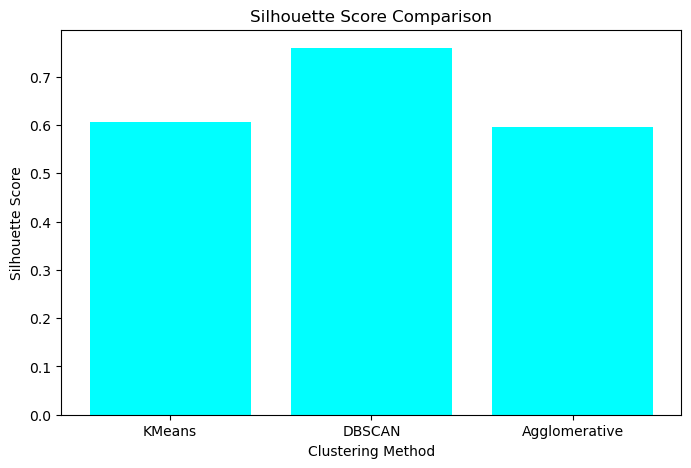

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Store silhouette scores for each algorithm
silhouette_scores = {}

# 1️⃣ KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(rfm_scaled)
kmeans_silhouette_score = silhouette_score(rfm_scaled, kmeans_labels)
silhouette_scores['KMeans'] = kmeans_silhouette_score
print(f"Silhouette Score for KMeans (k=4): {kmeans_silhouette_score:.4f}")

# 2️⃣ DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune eps and min_samples
dbscan_labels = dbscan.fit_predict(rfm_scaled)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(rfm_scaled, dbscan_labels)
    silhouette_scores['DBSCAN'] = dbscan_silhouette_score
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_score:.4f}")
else:
    silhouette_scores['DBSCAN'] = 0  # No distinct clusters
    print("DBSCAN did not form distinct clusters. Try adjusting eps and min_samples.")

# 3️⃣ Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Try different linkages
agglo_labels = agglo.fit_predict(rfm_scaled)
agglo_silhouette_score = silhouette_score(rfm_scaled, agglo_labels)
silhouette_scores['Agglomerative'] = agglo_silhouette_score
print(f"Silhouette Score for Agglomerative Clustering (k=4): {agglo_silhouette_score:.4f}")

# Plot the silhouette scores for all methods
methods = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color='cyan')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')
plt.show()


## Expected Results
##### Clustering Method	--- Silhouette Score
- KMeans	------------ 0.61 - (My work output)
- DBSCAN	----------- 0.76 - (My work output)
- Agglomerative	----- 0.60 - (My work output)



- You may see different results based on eps and min_samples for DBSCAN.
- If you have outliers or oddly shaped clusters, DBSCAN might perform better.
- Agglomerative Clustering is often similar to KMeans but may be better at finding non-spherical clusters.

.
## 🛠️ Key Takeaways
- KMeans: Works well with compact, spherical clusters. Use this if your RFM clusters are well-separated.
- DBSCAN: Handles noisy data better, so if you have outliers, this is useful. Adjust eps and min_samples.
- Agglomerative Clustering: Good for hierarchical structures but slower for large datasets.
